In [1]:
# Drop variables that don't seem to be contributing much of have problems
# (Wave 9 variables, high (anti-/)correlation variables, mostly not filled out, very low variance, too many categories)
# Transform variables (making some more easily readable
# and dummying non-ordinal categorical variables to create lots of new variables)
# rechecking if those new variables suffer from excessive levels of correlation

# Output: 
# BES_reduced - imputed dataset post-transformation
# BES_reduced_with_na - non-imputed dataset post-transformation


In [2]:
# import numpy as np
# import pandas as pd
# %matplotlib inline
# import matplotlib.pyplot as plt
# import gc
# import re

# from itertools import cycle
# from IPython.display import display
# import pickle, os

# import seaborn as sns

# encoding = "ISO-8859-1"

# import Jupyter_module_loader

# from utility import *

In [3]:
# # you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

# if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
#     raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

# BES_code_folder   = "../BES_analysis_code/" # we should be here!
# BES_small_data_files = BES_code_folder + "small data files" + os.sep
# if not os.path.exists( BES_small_data_files ):
#     os.makedirs( BES_small_data_files )

# # we should create these if they don't already exist
# BES_data_folder   = "../BES_analysis_data/"
# if not os.path.exists( BES_data_folder ):
#     os.makedirs( BES_data_folder )

# BES_output_folder = "../BES_analysis_output/"
# if not os.path.exists( BES_output_folder ):
#     os.makedirs( BES_output_folder )
    
# BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

In [5]:
# dataset_name = "W19_comb"

In [6]:
# # %%time

# manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

# data_subfolder = BES_data_folder + dataset_name + os.sep

# filename = manifest["Stata_Filename"].values[0]

# BES_Panel  = pd.read_pickle(data_subfolder + filename.replace('.dta','.zip'),compression='zip')
# print("BES_Panel", BES_Panel.shape )


# # BES_numeric = pd.read_msgpack( data_subfolder + "BESnumeric.msgpack" )
# BES_numeric = pd.read_pickle( data_subfolder + "BESnumeric.zip", compression='zip' )
# print("BES_numeric",  BES_numeric.shape )

# try:
#     var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
#     var_type.set_index("Unnamed: 0", inplace=True)
# except:
#     var_type    = pd.read_hdf( data_subfolder + "var_type.hdf", encoding=encoding)
# print("var_type",  var_type.shape )

# fname = data_subfolder + "cat_dictionary.pkl"
# with open(fname, "rb") as f:
#     cat_dictionary = pickle.load( f )

BES_Panel (97158, 7911)
BES_numeric (97158, 7634)
var_type (7911, 14)


In [1]:
%%time
dataset_name = "W19_comb"
df_list = 'BES_Panel_clean|BESnumeric'
%matplotlib inline
%run BES_header.py {dataset_name} {df_list}
(var_type, cat_dictionary, new_old_col_names, old_new_col_names) = get_small_files(data_subfolder, encoding)    

Toggle code

var_type (8079, 14)
Wall time: 29.1 s


In [2]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [8]:
# ## somewhere better for this

###################################################


# reader = pd.io.stata.StataReader(BES_data_folder+"W19_comb//"+"BES2019_W19_Panel_v0.2.dta")

# header = reader.variable_labels()
# labels = reader.value_labels()

# pd.Series(header).to_pickle(BES_data_folder+"W19_comb//"+"column_description.zip",compression='zip')
# import pickle
# with open(BES_data_folder+"W19_comb//"+"variable_labels.zip", 'wb') as handle:
#     pickle.dump(labels, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [3]:
BES_numeric=BESnumeric
del BESnumeric

BES_Panel = BES_Panel_clean
del BES_Panel_clean


In [4]:
# BES_numeric.dtypes.value_counts()

float32    7650
dtype: int64

In [4]:
# BES_numeric.shape

In [5]:
%%time
medians = BES_numeric.astype('float32').median()

Wall time: 2min 16s


In [6]:
# BES_numeric.dtypes.apply(lambda x: str(x.name)).to_dict()

In [7]:
%%time
BES_imputed = BES_numeric.astype( 'float32' ).fillna(medians)
gc.collect()

Wall time: 8.03 s


0

In [8]:
BES_imputed = BES_imputed.apply(lambda x: pd.to_numeric( x , downcast='unsigned' ) )

In [9]:
BES_imputed.dtypes.value_counts()

uint8      7604
uint16       27
float32      11
uint32        8
dtype: int64

In [11]:
# BES_imputed = BES_numeric.fillna(medians)
# print("BES_imputed",  BES_imputed.shape )

In [32]:
# %%time
# imputation_method = "mice" # "mice", "softimpute", "median", ???
# imputed_file_name = "BES" + imputation_method + wave

# imputation_method = "median" # "mice", "softimpute", "median", ???
# imputed_file_name = "BES" + imputation_method + wave


# BES_imputed = pd.read_hdf( BES_data_folder + imputed_file_name  + ".hdf", imputed_file_name )
# BES_numeric.replace(-1,np.nan,inplace=True)
# BES_imputed = BES_numeric.fillna(BES_numeric.median())


In [19]:
# bool_vars = BES_numeric.columns[BES_numeric.dtypes=="boolean"]
# BES_numeric[bool_vars] = BES_numeric[bool_vars].astype('Int8')

In [116]:
# England_inds = BES_Panel[BES_Panel["country"]=="England"].index
# print ( "respondents not from England: ", len(BES_Panel) - len(England_inds) )
# Remain_inds  = BES_Panel[ BES_Panel["euRefVote"].cat.codes==0 ].index
# Leave_inds   = BES_Panel[ BES_Panel["euRefVote"].cat.codes==1 ].index
# Notvoters_inds  = BES_Panel[ BES_Panel["euRefVote"].cat.codes==2 ].index
# Dontknow_inds   = BES_Panel[ BES_Panel["euRefVote"].cat.codes==3 ].index
# print ( "respondents not Remain/Leave: ", len(BES_Panel) - len(Remain_inds) - len(Leave_inds) )
# Leave_Remain_inds = pd.Index( np.concatenate( (Leave_inds, Remain_inds), axis=0 ) )
# EngRemLea_inds = pd.Index( np.intersect1d( England_inds, Leave_Remain_inds ) )

In [117]:
# W9_vars = pd.Index([x for x in BES_numeric.columns if "W9" in x])
# print ( "W9 columns: ", W9_vars )

In [118]:
# W9_vars = []

In [10]:
opts_per_cat = BES_numeric.apply(lambda x: len(pd.unique(x.dropna()))).sort_values()
many_cat_drop_list = opts_per_cat[opts_per_cat>60].index
# added to make sure we're only dropping *categorical* variables with lots of categories!
many_cat_drop_list = [x for x in var_type.loc[many_cat_drop_list].index
                      if var_type.loc[many_cat_drop_list].loc[x]["type"] in [3,7]]
print("many_cat_drop_list", many_cat_drop_list )

many_cat_drop_list ['pconW6', 'pconW3', 'pconW4', 'pconW7', 'pconW1', 'mpNameW1', 'pconW10', 'pconW2', 'pconW8', 'pconW9', 'pconW15', 'pconW5', 'pconW19', 'pconW18', 'pconW16', 'pconW12', 'pconW11', 'pconW14', 'pconW17', 'pconW13']


In [11]:
many_cat_drop_list

['pconW6',
 'pconW3',
 'pconW4',
 'pconW7',
 'pconW1',
 'mpNameW1',
 'pconW10',
 'pconW2',
 'pconW8',
 'pconW9',
 'pconW15',
 'pconW5',
 'pconW19',
 'pconW18',
 'pconW16',
 'pconW12',
 'pconW11',
 'pconW14',
 'pconW17',
 'pconW13']

In [120]:
# %%time
# counts = BES_numerics_only[BES_num_and_cat["wave9"]==1 ].count()
# counts_by_individuals = BES_numerics_only[BES_num_and_cat["wave9"]==1 ].count(axis=1) # lets see
# f, axarr = plt.subplots( 2 ,figsize=(5, 5) )
# axarr[0].hist(counts,bins=50)
# axarr[1].hist(counts_by_individuals,bins=50)

In [121]:
# drop people who are coverage outliers
# say top and bottom 5%
# BES_red = BES_numerics_only.loc[BES_reduced["wave9"]==1 ].copy()

In [122]:
# thresh = .00
# BES_red = BES_numeric.copy()
# BES_red["coverage"] = BES_numeric.count(axis=1)/BES_numeric.shape[1]

# outlier_people = BES_red[( BES_red["coverage"]>BES_red["coverage"].quantile(1-thresh) ) | 
#                          ( BES_red["coverage"]<BES_red["coverage"].quantile(  thresh) ) ].index
# inlier_people  = BES_red[( BES_red["coverage"]<BES_red["coverage"].quantile(1-thresh) ) & 
#                          ( BES_red["coverage"]>BES_red["coverage"].quantile(  thresh) ) ].index

Wall time: 14.5 s


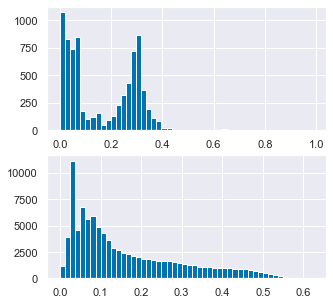

In [21]:
%%time
# columns histogrammed by %non-missing values
# rows histogrammed by %non-missing values

counts = BES_numeric.count()/BES_numeric.shape[0]
counts_by_individuals = BES_numeric.count(axis=1)/BES_numeric.shape[1] # lets see
f, axarr = plt.subplots( 2 ,figsize=(5, 5) )
ax = axarr[0].hist(counts,bins=50)
ax = axarr[1].hist(counts_by_individuals,bins=50)

In [22]:
# In theory, this is picked on the basis of looking at the above two diagrams (really, the top one!)
# thresh = 0.33
# missing_value_thresh = 0.33
missing_value_thresh = 0.05

mostly_not_filled_out = counts[counts<= (counts.max()*missing_value_thresh)].index
mostly_filled_out     = counts[counts>  (counts.max()*missing_value_thresh)].index

In [23]:
# missing_value_thresh = 0.8

# mostly_not_filled_out = counts[counts<= (counts.max()*missing_value_thresh)].index
# mostly_filled_out     = counts[counts>  (counts.max()*missing_value_thresh)].index

In [24]:
print(BES_numeric[mostly_filled_out].shape)
missing_fraction = BES_numeric[mostly_filled_out].isnull().sum().sum() / \
    (BES_numeric[mostly_filled_out].shape[0]*BES_numeric[mostly_filled_out].shape[1])
print(missing_fraction)

(97006, 5484)
0.7803270547470629


In [44]:
# %%time
# frac=.2
# BES_numeric.sample(frac=frac).sample(frac=frac, axis=1).shape
# np.corrcoef( BES_numeric.sample(frac=frac).sample(frac=frac, axis=1) )
# BES_numeric.sample(frac=frac).sample(frac=frac, axis=1).corr(min_periods=100, method='pearson')



In [17]:
def memory_cheap_corrcoef(x):
    rowvar=True
    m = np.asarray(x)
    dtype = np.result_type(m, np.float32)
    X = np.array(m, ndmin=2, dtype=dtype).T
    fact = X.shape[1]
    avg = np.average(X, axis=1, returned=True)
    X-= avg[0][:,None]
    c = np.dot(X, X.T.conj())/fact
    # c *= np.true_divide(1, fact)
    c= c.squeeze()    
    
    try:
        d = np.diag(c)
    except ValueError:
        # scalar covariance
        # nan if incorrect value (nan, inf, 0), 1 otherwise
        return c / c
    stddev = np.sqrt(d.real)
    c /= stddev[:, None]
    c /= stddev[None, :]

    # Clip real and imaginary parts to [-1, 1].  This does not guarantee
    # abs(a[i,j]) <= 1 for complex arrays, but is the best we can do without
    # excessive work.
    np.clip(c.real, -1, 1, out=c.real)
    if np.iscomplexobj(c):
        np.clip(c.imag, -1, 1, out=c.imag)

    return c



In [79]:
# np.array(m, ndmin=2, dtype=dtype)

20

In [77]:
memory_use(locs = locals().items())

                   BES_numeric:   2.8GiB
               BES_Panel_clean: 944.5MiB
                   BES_imputed: 718.7MiB
                            __: 358.1MiB
                           _71: 358.1MiB
                      var_type:   6.8MiB
                           _47:   1.6MiB
         counts_by_individuals:   1.5MiB
                  opts_per_cat: 930.2KiB
                        counts: 930.2KiB


In [76]:
# BES_imputed.loc[BES_imputed.index[::2]]

In [18]:
%%time
corrs = memory_cheap_corrcoef(BES_imputed.astype('float32'))
corr_mat = pd.DataFrame(corrs,index=BES_imputed.columns, columns=BES_imputed.columns)
corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')
# .loc[BES_imputed.index[::4]]

Wall time: 1min 40s


In [19]:
# corrs.shape
# corr_mat = pd.DataFrame(corrs,index=BES_imputed.columns, columns=BES_imputed.columns)
# corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')

In [108]:
# pd.DataFrame(corrs,

In [109]:
# %%time
# # 0.05, 0.0025: 2.34
# # 0.10, 0.01: 10.7s
# # 0.10, spearman: 27s
# # 0.10, kendall: 56s
# # 0.15, 0.0225, pearson: 29s
# # 0.20, 0.04, pearson: 65s
# # 30 mins?
# # W14_only: 55s
# try:
#     corr_mat = pd.read_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')
# except:
#     corr_mat = BES_numeric.corr()
#     corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df.zip",compression='zip')

Wall time: 8.26 s


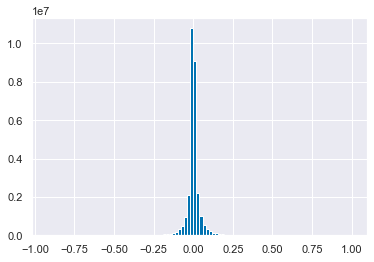

In [20]:
%%time
## 5 minutes!
## 8h 41min 19s on W10_comb panel!

# data = BES_numeric
# corr_mat = BES_numeric.corr()

# create lower triangle - diag mask
col_vars = len( corr_mat )
df = pd.DataFrame( np.arange(col_vars*col_vars).reshape(col_vars,col_vars) )
mask = np.ones(df.shape,dtype='bool')
mask[np.triu_indices(len(df))] = False
corr_mat.mask(~mask).stack().hist(bins=100)

In [21]:
# build a data frame of pairs of highly corr/anti-corr variables
# score on correlation, %non-missing values for each
# Building the high_corr_list is still **manual** (not much reason to automate)


corr_df = pd.DataFrame(columns = ["var1","var2","corr","var1%","var2%","min var%"])

id_num = 0

# min_filled_out = 0.02
min_filled_out = 0.02

thresh = .05
x = ( ( corr_mat>(1-thresh) ) &mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    c = BES_numeric[a].notnull().mean()
    d = BES_numeric[b].notnull().mean()
    mincd = min(c,d)
    if mincd > min_filled_out:
        corr_df.loc[id_num] = [ a,b,corr_mat[a][b], c, d, mincd ]
        id_num = id_num + 1


x = ( ( corr_mat<(thresh-1) ) &mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    c = BES_numeric[a].notnull().mean()
    d = BES_numeric[b].notnull().mean()
    mincd = min(c,d)
    if (mincd > min_filled_out):
        corr_df.loc[id_num] = [ a,b,corr_mat[a][b], c, d, mincd ]
        id_num = id_num + 1

corr_df

,var1,var2,corr,var1%,var2%,min var%
0,euRefVoteUnsqueezeW7,euRefVoteW7,0.962654,0.269860,0.289096,0.269860
1,euRefVote2W8,euRefVoteUnsqueezeW8,0.968464,0.276282,0.260963,0.260963
2,ns_sec_analyticW16W17W18,ns_secW16W17W18,0.980678,0.397769,0.397769,0.397769
3,ns_sec_analyticW19,ns_secW19,0.980566,0.269128,0.269128,0.269128
4,JACS_subjectW19,JACS_subject_labelW19,0.995084,0.162237,0.162237,0.162237
5,p_sexualityW10,xsexualityW10,0.998598,0.297116,0.297054,0.297054
6,p_gross_householdW17,incomeW17,0.999934,0.263726,0.263726,0.263726
7,p_edlevelUniW7,p_edlevelW7,0.981156,0.294755,0.270664,0.270664
8,p_edlevelUniW9,p_edlevelW9,0.979715,0.288188,0.262097,0.262097
9,p_edlevelUniW10,p_edlevelW10,0.981351,0.289951,0.266045,0.266045


In [22]:
# corr_df.to_hdf(BES_data_folder+"corr_dfW10Panel.hdf","corr_dfW10Panel")


In [23]:
corr_df

,var1,var2,corr,var1%,var2%,min var%
0,euRefVoteUnsqueezeW7,euRefVoteW7,0.962654,0.269860,0.289096,0.269860
1,euRefVote2W8,euRefVoteUnsqueezeW8,0.968464,0.276282,0.260963,0.260963
2,ns_sec_analyticW16W17W18,ns_secW16W17W18,0.980678,0.397769,0.397769,0.397769
3,ns_sec_analyticW19,ns_secW19,0.980566,0.269128,0.269128,0.269128
4,JACS_subjectW19,JACS_subject_labelW19,0.995084,0.162237,0.162237,0.162237
5,p_sexualityW10,xsexualityW10,0.998598,0.297116,0.297054,0.297054
6,p_gross_householdW17,incomeW17,0.999934,0.263726,0.263726,0.263726
7,p_edlevelUniW7,p_edlevelW7,0.981156,0.294755,0.270664,0.270664
8,p_edlevelUniW9,p_edlevelW9,0.979715,0.288188,0.262097,0.262097
9,p_edlevelUniW10,p_edlevelW10,0.981351,0.289951,0.266045,0.266045


In [114]:
# corr_df = pd.read_hdf(BES_data_folder+"corr_dfW10Panel.hdf","corr_dfW10Panel")

In [115]:
corr_df.sort_values(by="min var%",ascending=False).head(70)

,var1,var2,corr,var1%,var2%,min var%
19,ns_sec_analyticW6W7W8W9,ns_secW6W7W8W9,0.978632,0.413366,0.413366,0.413366
2,ns_sec_analyticW16W17W18,ns_secW16W17W18,0.980678,0.397769,0.397769,0.397769
15,p_edlevelUniW16,p_edlevelW16,0.979386,0.360050,0.328444,0.328444
23,gorW20,gorW14,0.994325,0.318640,0.320217,0.318640
21,gorW8,gorW7,0.995970,0.317774,0.318485,0.317774
22,gorW13,gorW11,0.994587,0.317486,0.319114,0.317486
20,ageGroup,ageW1,0.966781,0.315331,0.315331,0.315331
24,pconW1,mpNameW1,1.000000,0.315310,0.315310,0.315310
11,p_edlevelUniW12,p_edlevelW12,0.979787,0.329887,0.300703,0.300703
18,p_edlevelUniW17,p_edlevelW17,0.979384,0.320578,0.299899,0.299899


In [116]:
corr_df[corr_df["min var%"]>missing_value_thresh]

,var1,var2,corr,var1%,var2%,min var%
0,euRefVoteUnsqueezeW7,euRefVoteW7,0.962654,0.269860,0.289096,0.269860
1,euRefVote2W8,euRefVoteUnsqueezeW8,0.968464,0.276282,0.260963,0.260963
2,ns_sec_analyticW16W17W18,ns_secW16W17W18,0.980678,0.397769,0.397769,0.397769
3,ns_sec_analyticW19,ns_secW19,0.980566,0.269128,0.269128,0.269128
4,JACS_subjectW19,JACS_subject_labelW19,0.995084,0.162237,0.162237,0.162237
5,p_sexualityW10,xsexualityW10,0.998598,0.297116,0.297054,0.297054
6,p_gross_householdW17,incomeW17,0.999934,0.263726,0.263726,0.263726
7,p_edlevelUniW7,p_edlevelW7,0.981156,0.294755,0.270664,0.270664
8,p_edlevelUniW9,p_edlevelW9,0.979715,0.288188,0.262097,0.262097
9,p_edlevelUniW10,p_edlevelW10,0.981351,0.289951,0.266045,0.266045


,var1,var2,corr,var1%,var2%,min var%
0,euRefVoteUnsqueezeW7,euRefVoteW7,0.962654,0.269860,0.289096,0.269860
1,euRefVote2W8,euRefVoteUnsqueezeW8,0.968464,0.276282,0.260963,0.260963
2,ns_sec_analyticW16W17W18,ns_secW16W17W18,0.980678,0.397769,0.397769,0.397769
3,ns_sec_analyticW19,ns_secW19,0.980566,0.269128,0.269128,0.269128
4,JACS_subjectW19,JACS_subject_labelW19,0.995084,0.162237,0.162237,0.162237
5,p_sexualityW10,xsexualityW10,0.998598,0.297116,0.297054,0.297054
6,p_gross_householdW17,incomeW17,0.999934,0.263726,0.263726,0.263726
7,p_edlevelUniW7,p_edlevelW7,0.981156,0.294755,0.270664,0.270664
8,p_edlevelUniW9,p_edlevelW9,0.979715,0.288188,0.262097,0.262097
9,p_edlevelUniW10,p_edlevelW10,0.981351,0.289951,0.266045,0.266045


In [ ]:
# np.linalg.matrix_rank(BES_imputed.values),BES_imputed.shape

In [153]:
# BES_imputed.columns[ BES_imputed.isnull().all() ]

In [33]:
BES_Panel["JACS_subjectW19"].value_counts()


N    2068
L    1724
C    1403
H    1255
V    1175
F    1165
Q    1097
B     950
W     826
I     703
X     700
G     601
M     469
R     411
P     346
K     240
D     200
A     172
J     159
T      46
Y      28
Name: JACS_subjectW19, dtype: int64

In [30]:
list( search(BES_Panel,"p_edlevelW\d+").index )

['p_edlevelW1',
 'p_edlevelW2',
 'p_edlevelW3',
 'p_edlevelW4',
 'p_edlevelW5',
 'p_edlevelW6',
 'p_edlevelW7',
 'p_edlevelW8',
 'p_edlevelW9',
 'p_edlevelW10',
 'p_edlevelW11',
 'p_edlevelW12',
 'p_edlevelW13',
 'p_edlevelW14',
 'p_edlevelW15',
 'p_edlevelW16',
 'p_edlevelW17',
 'p_edlevelW18',
 'p_edlevelW19']

In [28]:
high_corr_drop_list = []

for ind in corr_df.index:
    if corr_df.loc[ind]["var1%"] == corr_df.loc[ind]["var2%"]: # prefer age over ageGroup
        options = set(corr_df.loc[ind][["var1" , "var2"]].values)
        if 'age' in options:
#             print(ind, list(options.difference(['age']))[0] )
            high_corr_drop_list.append( list(options.difference(['age']))[0] )
    elif corr_df.loc[ind]["var1%"] < corr_df.loc[ind]["var2%"]:
#         print(ind, corr_df.loc[ind]["var1"])
        high_corr_drop_list.append( corr_df.loc[ind]["var1"] )
    else:
#         print(ind, corr_df.loc[ind]["var2"])
        high_corr_drop_list.append( corr_df.loc[ind]["var2"] )
    
high_corr_drop_list = list( set(high_corr_drop_list) ) # make unique
high_corr_drop_list

['p_edlevelW11',
 'gorW8',
 'p_edlevelW8',
 'p_edlevelW10',
 'p_edlevelW15',
 'p_edlevelW14',
 'p_edlevelW9',
 'euRefVoteUnsqueezeW8',
 'gorW20',
 'xsexualityW10',
 'p_edlevelW16',
 'p_edlevelW17',
 'gorW13',
 'euRefVoteUnsqueezeW7',
 'p_edlevelW13',
 'p_edlevelW12',
 'p_edlevelW7',
 'p_edlevelW19']

In [12]:
high_corr_drop_list = ['euRefVoteUnsqueeze', 'euRefVote2', 'euRefVotePost',
                       'ageGroup', 'Age','xsexualityW10','JACS_subjectW19']
high_corr_drop_list.extend(['p_edlevelW1', 'p_edlevelW2', 'p_edlevelW3', 'p_edlevelW4', 'p_edlevelW5', 'p_edlevelW6', 'p_edlevelW7', 'p_edlevelW8', 'p_edlevelW9', 'p_edlevelW10', 'p_edlevelW11', 'p_edlevelW12', 'p_edlevelW13', 'p_edlevelW14', 'p_edlevelW15', 'p_edlevelW16', 'p_edlevelW17', 'p_edlevelW18', 'p_edlevelW19'])
high_corr_drop_list

['euRefVoteUnsqueeze',
 'euRefVote2',
 'euRefVotePost',
 'ageGroup',
 'Age',
 'xsexualityW10',
 'JACS_subjectW19',
 'p_edlevelW1',
 'p_edlevelW2',
 'p_edlevelW3',
 'p_edlevelW4',
 'p_edlevelW5',
 'p_edlevelW6',
 'p_edlevelW7',
 'p_edlevelW8',
 'p_edlevelW9',
 'p_edlevelW10',
 'p_edlevelW11',
 'p_edlevelW12',
 'p_edlevelW13',
 'p_edlevelW14',
 'p_edlevelW15',
 'p_edlevelW16',
 'p_edlevelW17',
 'p_edlevelW18',
 'p_edlevelW19']

In [156]:
# pref_list ['age','euRefVote',]


# high_corr_drop_list = []

# if ('age' in BES_numeric.columns) and ('Age' in BES_numeric.columns):
#     high_corr_drop_list.extend('Age')
    
# if ('ageGroup' in BES_numeric.columns) and ('age' in BES_numeric.columns):
#     high_corr_drop_list.extend('ageGroup')
    
# if ('euRefVote' in BES_numeric.columns) and ('age' in BES_numeric.columns):
#     high_corr_drop_list.extend('ageGroup')    

# high_corr_drop_list.extend(['euRefVoteUnsqueeze', 'euRefVote2', 'euRefVotePost',
#                        'ageGroup', 'voted2015', "ns_sec" , 'recallVote15'])
# # # 
# # high_corr_drop_list = ['euRefVoteUnsqueeze', 'euRefVote2', 'euRefVotePost',
# #                        'ageGroup', 'Age', 'profile_turnout_2015', "ns_sec" , 'profile_past_vote_2015',"euIDW9"]

# # high_corr_drop_list = ["euID","ageGroup","euRefpastVote","voted2015"]

In [157]:
### HIGH CORR DROP LIST OVERRIDE
# high_corr_drop_list = []

In [ ]:
%%time
## TEST VARIANCES
a = BES_imputed.var()
b = a<a.quantile(.05)
# a[b].hist(bins=100)
very_low_var = BES_imputed.columns[b]
# a.quantile(.01)

In [159]:
# drop columns below certain % filled out (2%)
# drop columns which are identical (drop least filled in) or directly derived
# make a list of derived columns??? -> scales

# WHAT TO REMOVE?
# W9_vars
# two_opt_cats
# many_cat_drop_list
# high_corr_drop_list
# mostly_not_filled_out
# mostly_filled_out

In [18]:
gc.collect()
BES_numeric[BES_numeric.columns[0:1000]].var()

ukCitizenW1                       0.022028
euCitizenW1                       0.039993
commonwealthCitizenW1             0.028047
otherCitizenW1                    0.010549
bestOnMIIW1                       5.849729
                                    ...   
responsibleEducationDontKnowW3    0.101143
responsibleCostLiveConW3          0.204647
responsibleCostLiveLDW3           0.183129
responsibleCostLiveLabW3          0.156439
responsibleCostLiveScotGovtW3     0.066577
Length: 1000, dtype: float32

In [19]:
gc.collect()
a = BES_numeric.var()
# a[b].hist(bins=100)
very_low_var = BES_imputed.columns[a<a.quantile(.05)]

In [161]:
# mostly_not_filled_out =[]

In [162]:
# many_cat_drop_list =[]

In [22]:
gc.collect()

160

In [164]:
# high_corr_drop_list = []

In [165]:
# high_corr_drop_list

In [166]:
high_corr_drop_list = []

In [25]:
# Time to dump some variables!
# (The results of this may have been exported back to the Imputation script
# if it looks like nothing is happening, that's why!)


BES_reduced = BES_imputed.copy()
cols = BES_reduced.columns
print(BES_reduced.shape)

# # Wave 9 stuff
# BES_reduced.drop(W9_vars,axis=1,errors='ignore',inplace=True)
# print("W9_vars", BES_reduced.shape)
# drop_cols = cols.difference(BES_reduced.columns)
# if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
# cols = BES_reduced.columns

# Categorical variables with a huge number of categories
BES_reduced.drop(many_cat_drop_list,axis=1,errors='ignore',inplace=True)
print("many_cat_drop_list", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

# Variables which are redundant through very high correlation with other variables
BES_reduced.drop(high_corr_drop_list,axis=1,errors='ignore',inplace=True)
print("high_corr_drop_list", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

# Variables with 'too many' missing values
BES_reduced.drop(mostly_not_filled_out,axis=1,errors='ignore',inplace=True)
print("mostly_not_filled_out", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

# Variables with 'too low' variance
BES_reduced.drop(very_low_var,axis=1,errors='ignore',inplace=True) 
print("very_low_var", BES_reduced.shape)
drop_cols = cols.difference(BES_reduced.columns)
if ( (len(drop_cols) >0) and (len(drop_cols) <= 10) ): print(drop_cols) 
cols = BES_reduced.columns

(97006, 7650)
many_cat_drop_list (97006, 7630)
high_corr_drop_list (97006, 7607)
mostly_not_filled_out (97006, 5441)
very_low_var (97006, 5277)


In [26]:
# necessary because some imputation types impute values outside of range of available values
# kind of suggests ... maybe not such good imputation methods??
def float_2_categorical(series,cat_dict):
    ser = series.astype('int')
    ser = ser.apply( lambda x : min( x , len( cat_dict ) - 1) )
    ser = ser.apply( lambda x : max( x , 0 ) )
    ser = ser.apply( lambda x: cat_dict[x] )  
    return ser

In [27]:
# problem
#  'xprofile_house_tenure': 'Own â\x80\x93 outright',

In [28]:
# reorder categories in a categorical variable so that the most numerous subcategory goes first
# so it can be dropped automatically when dummying
# also, return name of reference subcategory
def select_reference_subcategory(non_ordinal):
    order = BES_numeric[non_ordinal]\
        .dropna().astype('int').apply( lambda x: cat_dictionary[non_ordinal][x] ).value_counts().index
    return BES_reduced[non_ordinal].astype('category').cat.reorder_categories( order ), order[0]

In [29]:
# Recreate and rename categorical non_ordinal and ordinal variables:
# ordinal two categories -> one single dummy binary variable labelled with positive category name (e.g gender_female)
# ordinal 3+ category variables just renamed to append "__top_value" to variable name
# non-ordinal 3+ categories -> split to individual dummy binary variables "category_subcateory"

# need to create a dict of new_variable_names with old col names
# to allow reinsertion of missing values, say
new_old_col_names = dict()
# we need to drop one sub-category for each categorical variable we dummy
# advice supports obvious guess - always choose most numerous subcategory to the reference subcategory
non_ordinal_base_subcat = dict()


In [30]:
# NON-ORDINAL CATEGORICAL VARIABLES
# get split into one variable for each category
# NOTE: Dummy variable/multicollinearity trap
# we need to choose a base variable for each category and drop it!
drop_reference = False

non_ordinal_list = var_type[ var_type["type"]==3 ].index.intersection(BES_reduced.columns)
for non_ordinal in non_ordinal_list:
    # return to text categories!
    BES_reduced[non_ordinal] = float_2_categorical(BES_reduced[non_ordinal],
                                                   cat_dictionary[non_ordinal])
    # reorder to place most numerous subcategory first
    BES_reduced[non_ordinal], non_ordinal_base_subcat[non_ordinal] = \
        select_reference_subcategory( non_ordinal  )
    
    # create dictionary so we have a record of which variable all newly generated ones come from!
    for subcat in cat_dictionary[non_ordinal]:
        new_col_name = non_ordinal + "_" + subcat
        new_old_col_names[new_col_name] = non_ordinal

if drop_reference == True:
    BES_reduced = pd.get_dummies( BES_reduced, columns=non_ordinal_list, drop_first=True ) 
else:
    BES_reduced = pd.get_dummies( BES_reduced, columns=non_ordinal_list, drop_first=False )
    

In [31]:
# BINARY CATEGORICAL VARIABLES
# get renamed with 'top' value separated by single underscore
# (this is the same as with non-ordinal variables - maybe use a different convention - like ___)
# i.e. haveDependents -> haveDependents_No

two_opt_cats = opts_per_cat[opts_per_cat==2].index.intersection(BES_reduced.columns)
for col in two_opt_cats:
    BES_reduced[col] = BES_reduced[col]\
    .astype('int').apply( lambda x: cat_dictionary[col][x] )\
    .astype('category').cat.reorder_categories(cat_dictionary[col])
    
    new_col_name = col + "_" + cat_dictionary[col][1]
    new_old_col_names[new_col_name] = col
    
BES_reduced = pd.get_dummies( BES_reduced, columns=two_opt_cats, drop_first=True )

In [32]:
# ORDINAL CATEGORICAL VARIABLES
# get renamed with 'top' value separated by double underscore
# i.e. likeBoris -> likeBoris__Strongly Agree

ordinal_list = var_type[ var_type["type"].apply(lambda x: x in [1,2,5]) ].index.intersection(BES_reduced.columns)
for ordinal in ordinal_list:
    new_col_name = ordinal + "__" + (cat_dictionary[ordinal])[-1:][0]
    BES_reduced.rename(columns={ordinal:new_col_name}, inplace=True)
    new_old_col_names[new_col_name] = ordinal
    
print("BES_reduced",BES_reduced.shape)

BES_reduced (97006, 9520)


In [33]:
# save decomp object    
fname = data_subfolder + "new_old_col_names.pkl"

with open(fname, "wb") as f:
    pickle.dump( new_old_col_names, f )

In [34]:
memory_use(locs = locals().items())

                   BES_numeric:   2.8GiB
                     BES_Panel: 944.5MiB
                   BES_reduced: 882.3MiB
                   BES_imputed: 716.2MiB
                           ___:  37.7MiB
                           _16:  37.7MiB
                      var_type:   6.8MiB
                           _14:   2.9MiB
         counts_by_individuals:   1.5MiB
                  opts_per_cat: 930.2KiB


In [46]:
memory_use(locs = locals().items())

                   BES_numeric:   2.8GiB
                     BES_Panel: 944.5MiB
                   BES_reduced: 882.3MiB
           BES_reduced_with_na: 882.3MiB
                      var_type:   6.8MiB
         counts_by_individuals:   1.5MiB
                  opts_per_cat:   1.1MiB
                        counts:   1.1MiB
                           _19:   1.1MiB
                       medians:   1.1MiB


In [47]:
BES_reduced.dtypes.value_counts()

uint8      9517
float32       3
dtype: int64

In [48]:
BES_reduced_with_na.dtypes.value_counts()

uint8      9517
float32       3
dtype: int64

In [ ]:
%%time
## slow! 2h 47min 41s

# 4h 19min 35s!!!?


## We should do correlation testing on a version with missing values
## and may also wish an output with missing values (e.g. to run weightedPCA on)
## Which means reinserting missing values

BES_reduced_with_na = BES_reduced.copy()

col_list = []

for col in BES_reduced_with_na:
    if col in new_old_col_names.keys():
        old_col = new_old_col_names[col]
        col_list.append(old_col)
#         null_series = BES_numeric[old_col].isnull()
    else:
        col_list.append(col)
#         null_series = BES_numeric[col].isnull()


# BES_reduced_with_na.loc[null_series,col] = np.nan
BES_reduced_with_na.where( BES_numeric[col_list].notnull(),other =np.nan inplace=True )

    
    # 2 option ordinal (name change)
    # 3+ option ordinal (name change)
    # categorical (split into lots of variables)
    # other (no name change)

In [53]:
BES_reduced_with_na.shape, len(col_list)

((97006, 9520), 9520)

In [ ]:
%%time
BES_reduced_with_na.where( BES_numeric[col_list].notnull(),other =np.nan, inplace=True )

In [37]:
# len( list( BES_reduced_with_na.columns[7143:] ) )

In [ ]:
BES_reduced_with_na.dtypes.value_counts()

In [ ]:
BES_reduced.dtypes.value_counts()

In [ ]:
float64_vars = BES_reduced_with_na.columns[BES_reduced_with_na.dtypes=='float64']

In [ ]:
BES_reduced_with_na[float64_vars] = BES_reduced_with_na[float64_vars].astype('float32')

In [ ]:
BES_numeric.dtypes

In [ ]:
dtypes = pd.Series([BES_numeric[new_old_col_names[x]].dtype.name  if x in new_old_col_names.keys() else BES_numeric[x].dtype.name for x in BES_reduced_with_na.columns])

In [ ]:
dtypes.index = BES_reduced_with_na.columns

In [ ]:
dtypes[BES_reduced_with_na.columns[[(x in new_old_col_names.keys()) and ("__" not in x) for x in BES_reduced_with_na.columns]]]='boolean'

In [ ]:
dtypes_dict = dtypes.to_dict()

In [ ]:
dtypes_dict

In [92]:
BES_reduced_with_na = BES_reduced_with_na.astype( dtypes_dict )

In [179]:
# BES_reduced_with_na[col][~null_series]

In [180]:
## TEST CORRELATIONS
# we want to avoid having columns which are basically the same data
# through very high correlation/anti-correlation
# and when we find them, we want to keep the column with less missing values

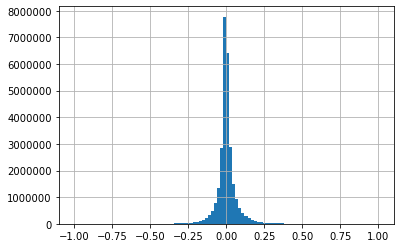

In [181]:
%%time
# data = BES_reduced_with_na
# corr_mat = BES_reduced_with_na.corr()

corrs = memory_cheap_corrcoef(BES_reduced_with_na.astype('float32'))
corr_mat = pd.DataFrame(corrs,index=BES_imputed.columns, columns=BES_imputed.columns)
corr_mat.to_pickle(BES_data_folder+dataset_name+os.sep+"corr_df2.zip",compression='zip')
# .loc[BES_imputed.index[::4]]
# create lower triangle - diag mask
col_vars = len( corr_mat )
df = pd.DataFrame( np.arange(col_vars*col_vars).reshape(col_vars,col_vars) )
mask = np.ones(df.shape,dtype='bool')
mask[np.triu_indices(len(df))] = False
corr_mat.mask(~mask).stack().hist(bins=100)

In [182]:
thresh = .05
x = ( ( corr_mat>(1-thresh) ) & mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    print( ( a,b,corr_mat[a][b], BES_reduced_with_na[a].notnull().mean(), BES_reduced_with_na[b].notnull().mean() ) )

x = ( ( corr_mat<(thresh-1) ) & mask ).values.nonzero()

for i in range( 0,len(x[0]) ):
    a = corr_mat.columns[ x[0][i] ]
    b = corr_mat.columns[ x[1][i] ]
    print( ( a,b,corr_mat[a][b], BES_reduced_with_na[a].notnull().mean(), BES_reduced_with_na[b].notnull().mean() ) )    

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.
('generalElectionCertaintyW5__Not at all certain', 'generalElectionCertaintyUnsqW5__Not at all certain', 1.0, 0.26000410424789655, 0.208441789884109)
('generalElectionCertaintyW5__Not at all certain', 'generalElectionCertaintySqW5__Not at all certain', 1.0, 0.26000410424789655, 0.051562314363787574)
('generalElectionCertaintyW12__Not at all certain', 'generalElectionCertaintyUnsqW12__Not at all certain', 1.0, 0.27428256666702666, 0.22846619935844126)
('ptvConW1__Very unlikely', 'likeConW1__Strongly like', 1.0, 0.15519457375225465, 0.1588667955544515)
('ptvConW1__Very unlikely', 'likeUKIPW1__Strongly like', 0.9999999999999998, 0.15519457375225465, 0.15342326676531262)
('eesEUIntegrationConW1__Unification should be pushed further', 'ptvLabW1__Very unlikely', 1.0, 0.1253199693261473, 0.1553781848423645)
('eesEUIntegrationConW1__Unification should b

('expectationDevoScotW3__It will neither gain nor lose any powers', 'govtHandleLevelCrimeW1__Very well', 1.0, 0.051065484355255056, 0.05191873589164785)
('scotUnionEconomyW3__Very unlikely', 'govtHandleCostLiveW1__Very well', 1.0, 0.053560435050277036, 0.05286919329927527)
('scotUnionEconomyW3__Very unlikely', 'govtHandleEconW1__Very well', 1.0, 0.053560435050277036, 0.05293399721343169)
('scotUnionEconomyW3__Very unlikely', 'govtHandleImmigW1__Very well', 1.0, 0.053560435050277036, 0.05265318025208723)
('scotUnionEconomyW3__Very unlikely', 'govtHandleNHSW1__Very well', 1.0, 0.053560435050277036, 0.05275038612332185)
('scotUnionEconomyW3__Very unlikely', 'govtHandleEducW1__Very well', 1.0, 0.053560435050277036, 0.051087085659973865)
('scotUnionEconomyW3__Very unlikely', 'govtHandleLevelCrimeW1__Very well', 1.0, 0.053560435050277036, 0.05191873589164785)
('scotUnionMeBetterOffW3__Very unlikely', 'govtHandleCostLiveW1__Very well', 1.0, 0.05391685657813732, 0.05286919329927527)
('scotUnio

('preferMPDisabledW6__Slightly more', 'EUIntegrationLDW4__Unite fully with the European Union', 1.0, 0.06860574378692473, 0.12799853111127912)
('preferMPDisabledW6__Slightly more', 'EUIntegrationLDW6__Unite fully with the European Union', 0.9999999999999999, 0.06860574378692473, 0.12603281238186786)
('preferMPYoungW6__Slightly more', 'ptvConW1__Very unlikely', 0.9878291611472622, 0.070625465778133, 0.15519457375225465)
('preferMPYoungW6__Slightly more', 'ptvUKIPW1__Very unlikely', 1.0, 0.070625465778133, 0.15620983507403846)
('preferMPEthnicW6__Slightly more', 'ptvConW1__Very unlikely', 0.9878291611472622, 0.07101428926307149, 0.15519457375225465)
('preferMPEthnicW6__Slightly more', 'ptvUKIPW1__Very unlikely', 1.0, 0.07101428926307149, 0.15620983507403846)
('preferMPChristW6__Slightly more', 'EUIntegrationConW4__Unite fully with the European Union', 1.0, 0.05891755862054068, 0.13702787648373962)
('preferMPChristW6__Slightly more', 'EUIntegrationLabW4__Unite fully with the European Unio

('warmGreeceW7__Very warm', 'EUIntegrationUKIPW4__Unite fully with the European Union', 1.0, 0.07629580826681931, 0.14057049045762365)
('warmGreeceW7__Very warm', 'EUIntegrationSelfW6__Unite fully with the European Union', 1.0, 0.07629580826681931, 0.14613282642271594)
('warmGreeceW7__Very warm', 'EUIntegrationLabW6__Unite fully with the European Union', 1.0, 0.07629580826681931, 0.13153034443280373)
('warmGreeceW7__Very warm', 'EUIntegrationLDW6__Unite fully with the European Union', 1.0, 0.07629580826681931, 0.12603281238186786)
('warmGreeceW7__Very warm', 'EUIntegrationUKIPW6__Unite fully with the European Union', 0.951189731211342, 0.07629580826681931, 0.1400412584920129)
('warmSpainW7__Very warm', 'EUIntegrationLabW4__Unite fully with the European Union', 1.0, 0.07696544871310228, 0.13299923315368248)
('warmSpainW7__Very warm', 'EUIntegrationLabW6__Unite fully with the European Union', 1.0, 0.07696544871310228, 0.13153034443280373)
('warmSpainW7__Very warm', 'EUIntegrationLDW6__Un

('ptvConW8__Very unlikely', 'riskUnemploymentW7__Very unlikely', 1.0, 0.0904230615529178, 0.30304470390011556)
('ptvConW8__Very unlikely', 'childBenefitsRepatriateW7__Yes, the same amount as UK citizens', 0.9999999999999999, 0.0904230615529178, 0.3126788858047026)
('ptvConW8__Very unlikely', 'tuSupportW7__Mainly remain', 1.0, 0.0904230615529178, 0.2600581075096936)
('ptvConW8__Very unlikely', 'turkeyW7__Worse', 1.0, 0.0904230615529178, 0.2765939062719388)
('ptvConW8__Very unlikely', 'lrUKIPW7__Right', 1.0, 0.0904230615529178, 0.2567207059306382)
('ptvConW8__Very unlikely', 'redistConW7__Government should try to make incomes equal', 1.0, 0.0904230615529178, 0.25376132718416194)
('ptvLabW8__Very unlikely', 'partyIdStrengthW7__Very strong', 0.9683296637314885, 0.09052026742415242, 0.2847159968462095)
('ptvLabW8__Very unlikely', 'ethno5W7__Strongly agree', 0.9561828874675149, 0.09052026742415242, 0.31757158132351193)
('ptvLabW8__Very unlikely', 'likeCorbynW7__Strongly like', 0.974558628915

('euID1W12__Strongly disagree', 'cspl2W7__Usually acceptable', 1.0, 0.07072267164936762, 0.0757881776059274)
('euID1W12__Strongly disagree', 'cspl3W7__£7,500', 1.0, 0.07072267164936762, 0.05036344195189389)
('euID1W12__Strongly disagree', 'csplRank_1W7__Second most common reason', 1.0, 0.07072267164936762, 0.08382386296132287)
('euID2W12__Strongly disagree', 'happyLeaveW7__Very unhappy', 1.0, 0.07643621674749154, 0.07526974629267608)
('euID2W12__Strongly disagree', 'cspl2W7__Usually acceptable', 1.0, 0.07643621674749154, 0.0757881776059274)
('euID2W12__Strongly disagree', 'csplRank_1W7__Second most common reason', 1.0, 0.07643621674749154, 0.08382386296132287)
('euID7W12__Strongly disagree', 'certaintyEUUKIPW7__Very certain', 1.0, 0.06877855422467517, 0.06700724723773316)
('ptvConW12__Very unlikely', 'euScepticismW7__Work towards single European government', 1.0, 0.0865348267035329, 0.07327162560618661)
('ptvConW12__Very unlikely', 'natSecurityLDW7__Protect civil liberties', 1.0, 0.086

('englishnessW12__Very strongly English', 'controlImmigW11__Some control', 1.0, 0.09468931923488179, 0.30471880501582294)
('englishnessW12__Very strongly English', 'euPriorityBalanceW11__Control immigration', 1.0, 0.09468931923488179, 0.2975687731538985)
('englishnessW12__Very strongly English', 'effectsEUImmigrationW11__Much lower', 1.0, 0.09468931923488179, 0.3082938209467852)
('englishnessW12__Very strongly English', 'effectsEUNHSW11__Worse', 1.0, 0.09468931923488179, 0.30340112542797587)
('englishnessW12__Very strongly English', 'UKsovereigntyPostW11__Much more likely', 1.0, 0.09468931923488179, 0.29605668182358214)
('englishnessW12__Very strongly English', 'immigEconW11__Good for economy', 1.0, 0.09468931923488179, 0.3130677092896411)
('englishnessW12__Very strongly English', 'immigSelfW11__Allow many more', 1.0, 0.09468931923488179, 0.3014246060462052)
('englishnessW12__Very strongly English', 'changeEconomyW11__Staying about the same', 1.0, 0.09468931923488179, 0.315022627366692

('econGenRetroW12__Stayed the same', 'changeEducationW11__Staying about the same', 1.0, 0.09034745698640198, 0.30027973689610854)
('econGenRetroW12__Stayed the same', 'changeImmigW11__Staying about the same', 1.0, 0.09034745698640198, 0.3064577100456868)
('econGenRetroW12__Stayed the same', 'wcEconW11__Stayed the same', 1.0, 0.09034745698640198, 0.28998671519759794)
('econGenRetroW12__Stayed the same', 'prefTradeoffW11__Strongly agree', 1.0, 0.09034745698640198, 0.31062676185641613)
('econGenRetroW12__Stayed the same', 'howToReduceDeficitW11__Only by increasing taxes', 1.0, 0.09034745698640198, 0.2823830559365786)
('econGenRetroW12__Stayed the same', 'warmWhiteW11__Very warm', 1.0, 0.09034745698640198, 0.30885545486947413)
('econGenRetroW12__Stayed the same', 'warmAsianW11__Very warm', 1.0, 0.09034745698640198, 0.30510762850076145)
('econGenRetroW12__Stayed the same', 'warmBlackW11__Very warm', 1.0, 0.09034745698640198, 0.3056692624234504)
('overseasAidW12__Strongly agree', 'winConstit

('competentMayW13__No competence at all', 'euID3W8__Strongly disagree', 1.0, 0.15536738419000506, 0.05326881743657317)
('competentMayW13__No competence at all', 'euID5W8__Strongly disagree', 1.0, 0.15536738419000506, 0.05214554959119531)
('ageW13', 'ageW1', 0.9964555557314937, 0.3362891118623565, 0.3281886225928046)
('ageW13', 'ageW7', 0.9995398545675799, 0.3362891118623565, 0.33368615464374046)
('ageW13', 'ageW8', 0.9998535592098361, 0.3362891118623565, 0.3618434553447028)
('ageW13', 'ageW9', 0.9999216083674396, 0.3362891118623565, 0.32440839426701373)
('ageW13', 'ageW11', 0.9994979078556573, 0.3362891118623565, 0.334344994437664)
('ageW13', 'ageW12', 0.9998164854560413, 0.3362891118623565, 0.37147763724928984)
('ageW14', 'ageW1', 0.9967563285070296, 0.3355006642401201, 0.3281886225928046)
('ageW14', 'ageW7', 0.9996024780654461, 0.3355006642401201, 0.33368615464374046)
('ageW14', 'ageW8', 0.9995515992568986, 0.3355006642401201, 0.3618434553447028)
('ageW14', 'ageW9', 0.999370802067204

('generalElectionVoteW13_Scottish National Party (SNP)', 'generalElectionVoteUnsqueezeW11_Scottish National Party (SNP)', 0.9501851052168311, 0.29992331536824823, 0.218799615496776)
('generalElectionVoteW13_Scottish National Party (SNP)', 'generalElectionVoteUnsqueezeW12_Scottish National Party (SNP)', 0.9605304502136439, 0.29992331536824823, 0.22736453281778218)
('generalElectionVoteW14_Scottish National Party (SNP)', 'generalElectionVoteUnsqueezeW12_Scottish National Party (SNP)', 0.9525027831811435, 0.25782237247129725, 0.22736453281778218)
('generalElectionVoteW15_Scottish National Party (SNP)', 'generalElectionVoteUnsqueezeW11_Scottish National Party (SNP)', 0.9550867988826282, 0.21711471372870922, 0.218799615496776)
('generalElectionVoteW15_Scottish National Party (SNP)', 'generalElectionVoteUnsqueezeW12_Scottish National Party (SNP)', 0.9519704619268536, 0.21711471372870922, 0.22736453281778218)
('generalElectionVoteTIGW15_Conservative', 'generalElectionVoteW15_Conservative', 0.

('educationW8W9W10_University or CNAA higher degree (eg M.Sc, Ph.D)', 'educationW7_University or CNAA higher degree (eg M.Sc, Ph.D)', 0.969308362534297, 0.4540162225798438, 0.32234546966636785)
('educationW8W9W10_No formal qualifications', 'educationW7_No formal qualifications', 0.9530004688674732, 0.4540162225798438, 0.32234546966636785)
('educationW8W9W10_Nursing qualification (eg SEN, SRN, SCM, RGN)', 'educationW7_Nursing qualification (eg SEN, SRN, SCM, RGN)', 0.9592078447262057, 0.4540162225798438, 0.32234546966636785)
('educationW9_University or CNAA first degree (eg BA, B.Sc, B.Ed)', 'educationW7_University or CNAA first degree (eg BA, B.Sc, B.Ed)', 0.9576682065364543, 0.314190977135019, 0.32234546966636785)
('educationW9_University or CNAA first degree (eg BA, B.Sc, B.Ed)', 'educationW8W9W10_University or CNAA first degree (eg BA, B.Sc, B.Ed)', 0.9672918022463953, 0.314190977135019, 0.4540162225798438)
('educationW9_University or CNAA higher degree (eg M.Sc, Ph.D)', 'educationW

('gorW14_West Midlands', 'gorW12_West Midlands', 0.9859871371523993, 0.3355006642401201, 0.37147763724928984)
('gorW14_East Midlands', 'gorW11_East Midlands', 0.9797197132742489, 0.3355006642401201, 0.334344994437664)
('gorW14_East Midlands', 'gorW12_East Midlands', 0.983827676889615, 0.3355006642401201, 0.37147763724928984)
('gorW14_Wales', 'country_Wales', 0.9677631824907842, 0.3355006642401201, 0.7203495091103502)
('gorW14_Wales', 'gorW11_Wales', 0.9911182668356867, 0.3355006642401201, 0.334344994437664)
('gorW14_Wales', 'gorW12_Wales', 0.9908335774290074, 0.3355006642401201, 0.37147763724928984)
('gorW14_North East', 'gorW11_North East', 0.9907159497125895, 0.3355006642401201, 0.334344994437664)
('gorW14_North East', 'gorW12_North East', 0.9904095200070328, 0.3355006642401201, 0.37147763724928984)
('localElectionVoteW14_Liberal Democrat', 'spendMost3W3_Infrastructure: Roads and Public Transport', 1.0, 0.09207556136390638, 0.05273958547096245)
('localElectionVoteW14_Liberal Democrat

('localElectionVoteW16_Green Party', 'scotElectionVoteListW6_Scottish National Party (SNP)', 1.0, 0.10901098426344952, 0.05217795154827352)
('workingStatusW16_Retired', 'workingStatusW15_Retired', 0.9592265604774782, 0.3967403631179323, 0.21825958287880587)
('educationW16_University or CNAA first degree (eg BA, B.Sc, B.Ed)', 'educationW15_University or CNAA first degree (eg BA, B.Sc, B.Ed)', 0.9716042237738016, 0.3918152656420448, 0.3202393424562844)
('educationW16_University or CNAA higher degree (eg M.Sc, Ph.D)', 'educationW15_University or CNAA higher degree (eg M.Sc, Ph.D)', 0.9691016539344978, 0.3918152656420448, 0.3202393424562844)
('educationW16_No formal qualifications', 'educationW15_No formal qualifications', 0.9608460958069373, 0.3918152656420448, 0.3202393424562844)
('ns_sec_analyticW16_Employers in large organisations and higher managerial', 'ns_secW16_Higher managerial and administrative occupations', 0.9594268286052968, 0.32473241383779583, 0.32473241383779583)
('miilabe

('gorW3_North West', 'gorW11_North West', 0.9687053926300843, 0.30065775972868763, 0.334344994437664)
('gorW3_North West', 'gorW12_North West', 0.9684580262614008, 0.30065775972868763, 0.37147763724928984)
('gorW3_North West', 'gorW14_North West', 0.9605264366239685, 0.30065775972868763, 0.3355006642401201)
('gorW3_North West', 'gorW15_North West', 0.9551883261992705, 0.30065775972868763, 0.33311372006869217)
('gorW3_North West', 'gorW16_North West', 0.9532189467794737, 0.30065775972868763, 0.40998196291055977)
('gorW3_North West', 'gorW13_North West', 0.9700389066820487, 0.30065775972868763, 0.3346582133560867)
('gorW3_North West', 'gorW2_North West', 0.9901627103177099, 0.30065775972868763, 0.32906347543391623)
('gorW3_East of England', 'gorW2_East of England', 0.9859699389741416, 0.30065775972868763, 0.32906347543391623)
('gorW3_South West', 'gorW11_South West', 0.9515886098360041, 0.30065775972868763, 0.334344994437664)
('gorW3_South West', 'gorW12_South West', 0.9516127836242216, 

('gor_Wales', 'gorW11_Wales', 0.9740281167403222, 0.7203603097627097, 0.334344994437664)
('gor_Wales', 'gorW12_Wales', 0.9743382411181907, 0.7203603097627097, 0.37147763724928984)
('gor_Wales', 'gorW14_Wales', 0.9677631824907842, 0.7203603097627097, 0.3355006642401201)
('gor_Wales', 'gorW15_Wales', 0.9592705522103794, 0.7203603097627097, 0.33311372006869217)
('gor_Wales', 'gorW16_Wales', 0.9608842504281871, 0.7203603097627097, 0.40998196291055977)
('gor_Wales', 'gorW13_Wales', 0.9728402879771448, 0.7203603097627097, 0.3346582133560867)
('gor_Wales', 'gorW2_Wales', 0.9942093876294549, 0.7203603097627097, 0.32906347543391623)
('gor_Wales', 'gorW3_Wales', 0.9896647832258189, 0.7203603097627097, 0.30065775972868763)
('gor_Wales', 'gorW6_Wales', 0.9812730643791836, 0.7203603097627097, 0.3087150463888019)
('gor_Yorkshire and the Humber', 'gorW11_Yorkshire and the Humber', 0.9722045256257041, 0.7203603097627097, 0.334344994437664)
('gor_Yorkshire and the Humber', 'gorW12_Yorkshire and the Hum

('profile_marital_statW13_Widowed', 'profile_marital_statW11_Widowed', 0.9938775241013699, 0.3362891118623565, 0.334344994437664)
('profile_marital_statW13_Separated (after being married)', 'profile_marital_statW11_Separated (after being married)', 0.9849843100491867, 0.3362891118623565, 0.334344994437664)
('profile_marital_statW13_Civil Partnership', 'profile_marital_statW11_Civil Partnership', 0.9662483644492982, 0.3362891118623565, 0.334344994437664)
('profile_newspaperW13_None', 'profile_newspaperW11_None', 0.9540538706761482, 0.3362891118623565, 0.334344994437664)
('profile_newspaperW13_The Daily Mail / The Scottish Daily Mail', 'profile_newspaperW11_The Daily Mail / The Scottish Daily Mail', 0.957748279840388, 0.3362891118623565, 0.334344994437664)
('profile_newspaperW13_The Guardian', 'profile_newspaperW11_The Guardian', 0.9615234792008271, 0.3362891118623565, 0.334344994437664)
('profile_newspaperW13_The Sun', 'profile_newspaperW11_The Sun', 0.9549100698044753, 0.33628911186235

('profile_marital_statW16_Married', 'profile_marital_statW15_Married', 0.9971083703714793, 0.40983075377752815, 0.3330597168068951)
('profile_marital_statW16_Never married', 'profile_marital_statW15_Never married', 0.9922261870073967, 0.40983075377752815, 0.3330597168068951)
('profile_marital_statW16_Living as married', 'profile_marital_statW15_Living as married', 0.9884066940143477, 0.40983075377752815, 0.3330597168068951)
('profile_marital_statW16_Divorced', 'profile_marital_statW15_Divorced', 0.9889046755192837, 0.40983075377752815, 0.3330597168068951)
('profile_marital_statW16_Widowed', 'profile_marital_statW15_Widowed', 0.9911391966965806, 0.40983075377752815, 0.3330597168068951)
('profile_marital_statW16_Separated (after being married)', 'profile_marital_statW15_Separated (after being married)', 0.9774982498205271, 0.40983075377752815, 0.3330597168068951)
('profile_religionW16_No, I do not regard myself as belonging to any particular religion.', 'profile_religionW15_No, I do not 

('mii_catW3_environment', 'miilabelW3_environment', 0.9503420078410325, 0.2618510158013544, 0.2110123451456468)
('mii_catW3_unemployment', 'miilabelW3_unemployment', 0.9581030355120206, 0.2618510158013544, 0.2110123451456468)
('mii_catW3_europe', 'miilabelW3_europe', 0.9688721640602119, 0.2618510158013544, 0.2110123451456468)
('mii_catW3_housing', 'miilabelW3_housing', 0.9881069854522212, 0.2618510158013544, 0.2110123451456468)
('mii_catW3_education', 'miilabelW3_education', 0.9880401098131495, 0.2618510158013544, 0.2110123451456468)
('mii_catW3_taxation', 'miilabelW3_taxation', 0.9540372848276523, 0.2618510158013544, 0.2110123451456468)
('mii_catW3_inflation', 'miilabelW3_inflation', 0.9733029676934147, 0.2618510158013544, 0.2110123451456468)
('LRAL_mii_catW7_Lib-auth', 'ptvLDW8__Very unlikely', 0.9901475429766744, 0.2925356691544169, 0.08972101914955663)
('LRAL_mii_catW3_General-negativity', 'miilabelW3_politics-neg', 0.951717845934559, 0.2411569658807392, 0.2110123451456468)
('small

('ldPriorities2_costLiveW4_Yes', 'eesEUIntegrationLDW1__Unification should be pushed further', 1.0, 0.05420847419184119, 0.12055688163565079)
('ldPriorities2_nhsW4_Yes', 'likeConW1__Strongly like', 1.0, 0.05420847419184119, 0.1588667955544515)
('ldPriorities2_nhsW4_Yes', 'likeLabW1__Strongly like', 1.0, 0.05420847419184119, 0.15884519424973267)
('ldPriorities2_nhsW4_Yes', 'likeGrnW1__Strongly like', 1.0, 0.05420847419184119, 0.15004266257681964)
('ldPriorities2_nhsW4_Yes', 'eesEUIntegrationSelfW1__Unification should be pushed further', 1.0, 0.05420847419184119, 0.1361206216855498)
('ldPriorities2_nhsW4_Yes', 'eesEUIntegrationLabW1__Unification should be pushed further', 1.0, 0.05420847419184119, 0.12119412012485554)
('ldPriorities2_nhsW4_Yes', 'eesEUIntegrationLDW1__Unification should be pushed further', 1.0, 0.05420847419184119, 0.12055688163565079)
('ldPriorities2_crimeW4_Yes', 'likeConW1__Strongly like', 1.0, 0.05420847419184119, 0.1588667955544515)
('ldPriorities2_crimeW4_Yes', 'li

('prPreferenceW9_That one party get more than half the seats in parliament so it can govern on its own', 'EUIntegrationLDW4__Unite fully with the European Union', 0.9958705948858224, 0.06445829328091417, 0.12799853111127912)
('labPriorities_crimeW3_Yes', 'handleMIILDW7__Very well', 1.0, 0.05873394753043084, 0.060451251255575836)
('labPriorities_crimeW3_Yes', 'handleMIIGrnW7__Very well', 0.9948497511671096, 0.05873394753043084, 0.05414367027768477)
('labPriorities_crimeW3_Yes', 'socialDistLDW7__Very unhappy', 0.9682458365518541, 0.05873394753043084, 0.07636061218097573)
('labPriorities_crimeW3_Yes', 'riskUnemploymentW8__Very unlikely', 1.0, 0.05873394753043084, 0.0611640943112964)
('labPriorities_crimeW3_Yes', 'euID3W8__Strongly disagree', 1.0, 0.05873394753043084, 0.05326881743657317)
('conPriorities_nhsW9_Yes', 'csplUncoverWrongsW2__Very confident', 1.0, 0.06775249225053193, 0.05539654595137546)
('conPriorities_costLiveW9_Yes', 'eesEUIntegrationLDW4__Unification should be pushed furth

('labPriorities_costLiveW9_Yes', 'csplConductPublicOfficialsW2__Very low', 1.0, 0.06364824435395898, 0.05231836002894575)
('profile_eurefturnout_Yes', 'euRefTurnoutRetroW9_Yes, voted', 1.0, 0.8032769179258428, 0.3233283290310735)
('profile_eurefvote_Stay/remain in the EU', 'euRefVoteW9_Stay/remain in the EU', 1.0, 0.7063194616954864, 0.303163511076069)
('profile_eurefvote_Stay/remain in the EU', 'euIDW9_The remain side', 0.9650689068106021, 0.7063194616954864, 0.3015758151792368)
('profile_eurefvote_Stay/remain in the EU', 'euRefpastVoteW15_Stay/remain in the EU', 0.9650705226966011, 0.7063194616954864, 0.289533087798503)
('profile_turnout_2015_Yes, voted', 'genElecTurnoutRetroW6_Yes, voted', 1.0, 0.6317517578061715, 0.32423558382926326)
('euRefpastVoteW11_Stay/remain in the EU', 'europeannessW12__Very strongly European', 1.0, 0.3002581355913897, 0.09356605138950393)
('euRefpastVoteW11_Stay/remain in the EU', 'econPersonalRetroW12__Stayed the same', 1.0, 0.3002581355913897, 0.093522848

('belongGroup_111W11_Yes', 'immigSelfW12__Allow many more', 1.0, 0.31591908151252335, 0.08920258783630532)
('belongGroup_111W11_Yes', 'immigLabW12__Allow many more', 1.0, 0.31591908151252335, 0.07787270351129208)
('noChanceCoalitionConW11_Yes', 'europeannessW12__Very strongly European', 1.0, 0.3070949485348915, 0.09356605138950393)
('noChanceCoalitionConW11_Yes', 'econPersonalRetroW12__Stayed the same', 1.0, 0.3070949485348915, 0.09352284878006632)
('noChanceCoalitionConW11_Yes', 'econGenRetroW12__Stayed the same', 1.0, 0.3070949485348915, 0.09034745698640198)
('noChanceCoalitionConW11_Yes', 'immigSelfW12__Allow many more', 1.0, 0.3070949485348915, 0.08920258783630532)
('noChanceCoalitionConW11_Yes', 'immigLabW12__Allow many more', 1.0, 0.3070949485348915, 0.07787270351129208)
('partyContactLabW2_Yes', 'likeSalmondW1__Strongly like', 1.0, 0.09808072407573418, 0.061930940628813984)
('partyContactLabW2_Yes', 'satDemScotW1__Very satisfied', 1.0, 0.09808072407573418, 0.060516055169732255)


('negotiationSpecifics_1W11_Yes', 'immigSelfW12__Allow many more', 1.0, 0.24749694881570847, 0.08920258783630532)
('negotiationSpecifics_1W11_Yes', 'immigLabW12__Allow many more', 1.0, 0.24749694881570847, 0.07787270351129208)
('negotiationSpecifics_3W11_Yes', 'europeannessW12__Very strongly European', 1.0, 0.24749694881570847, 0.09356605138950393)
('negotiationSpecifics_3W11_Yes', 'econPersonalRetroW12__Stayed the same', 1.0, 0.24749694881570847, 0.09352284878006632)
('negotiationSpecifics_3W11_Yes', 'econGenRetroW12__Stayed the same', 1.0, 0.24749694881570847, 0.09034745698640198)
('negotiationSpecifics_3W11_Yes', 'immigSelfW12__Allow many more', 1.0, 0.24749694881570847, 0.08920258783630532)
('negotiationSpecifics_3W11_Yes', 'immigLabW12__Allow many more', 1.0, 0.24749694881570847, 0.07787270351129208)
('noChanceCoalitionGrnW11_Yes', 'europeannessW12__Very strongly European', 1.0, 0.3070949485348915, 0.09356605138950393)
('noChanceCoalitionGrnW11_Yes', 'econPersonalRetroW12__Stayed 

('govtHandleLevelCrimeW3__Very well', 'likeLabW1__Strongly like', -1.0, 0.06832492682558026, 0.15884519424973267)
('govtHandleLevelCrimeW3__Very well', 'likeLDW1__Strongly like', -1.0, 0.06832492682558026, 0.15829436097940316)
('labHandleCostLiveW3__Very well', 'likeLabW1__Strongly like', -1.0, 0.065419551340901, 0.15884519424973267)
('labHandleCostLiveW3__Very well', 'likeLDW1__Strongly like', -1.0, 0.065419551340901, 0.15829436097940316)
('labHandleEconW3__Very well', 'likeLabW1__Strongly like', -1.0, 0.06559236177865144, 0.15884519424973267)
('labHandleEconW3__Very well', 'likeLDW1__Strongly like', -1.0, 0.06559236177865144, 0.15829436097940316)
('labHandleImmigW3__Very well', 'likeLabW1__Strongly like', -1.0, 0.06495512328944668, 0.15884519424973267)
('labHandleImmigW3__Very well', 'likeLDW1__Strongly like', -1.0, 0.06495512328944668, 0.15829436097940316)
('labHandleNHSW3__Very well', 'likeLabW1__Strongly like', -1.0, 0.06577597286876127, 0.15884519424973267)
('labHandleNHSW3__Very

('preferMPLocalW6__Slightly more', 'EUIntegrationLabW4__Unite fully with the European Union', -1.0, 0.07117629904846252, 0.13299923315368248)
('preferMPLocalW6__Slightly more', 'EUIntegrationLDW6__Unite fully with the European Union', -1.0, 0.07117629904846252, 0.12603281238186786)
('preferMPWorkClassW6__Slightly more', 'ptvLabW1__Very unlikely', -0.9607689228305227, 0.07219156037024636, 0.1553781848423645)
('preferMPDisabledW6__Slightly more', 'ptvLabW1__Very unlikely', -1.0, 0.06860574378692473, 0.1553781848423645)
('preferMPDisabledW6__Slightly more', 'ptvLDW1__Very unlikely', -1.0, 0.06860574378692473, 0.15533498223292688)
('preferMPDisabledW6__Slightly more', 'pidInterestedOthersW4__Strongly disagree', -1.0, 0.06860574378692473, 0.06915657705725425)
('preferMPDisabledW6__Slightly more', 'pidRuinDayW4__Strongly disagree', -1.0, 0.06860574378692473, 0.07011783511724108)
('preferMPDisabledW6__Slightly more', 'pidConnectedW4__Strongly disagree', -1.0, 0.06860574378692473, 0.0658731787

('warmPolandW7__Very warm', 'EUIntegrationConW6__Unite fully with the European Union', -1.0, 0.07646861870456975, 0.1364986445181289)
('warmRomaniaW7__Very warm', 'EUIntegrationLabW4__Unite fully with the European Union', -1.0, 0.07514013846436325, 0.13299923315368248)
('warmRomaniaW7__Very warm', 'EUIntegrationConW6__Unite fully with the European Union', -1.0, 0.07514013846436325, 0.1364986445181289)
('warmGreeceW7__Very warm', 'EUIntegrationLabW4__Unite fully with the European Union', -1.0, 0.07629580826681931, 0.13299923315368248)
('warmGreeceW7__Very warm', 'EUIntegrationConW6__Unite fully with the European Union', -1.0, 0.07629580826681931, 0.1364986445181289)
('warmSpainW7__Very warm', 'EUIntegrationConW4__Unite fully with the European Union', -1.0, 0.07696544871310228, 0.13702787648373962)
('warmSpainW7__Very warm', 'EUIntegrationUKIPW4__Unite fully with the European Union', -1.0, 0.07696544871310228, 0.14057049045762365)
('warmSpainW7__Very warm', 'EUIntegrationConW6__Unite ful

('dutyToVote2W8__Strongly agree', 'betterDealEUW7__Worse', -1.0, 0.09421409053106808, 0.2665709008824133)
('dutyToVote2W8__Strongly agree', 'conSupportW7__Mainly remain', -1.0, 0.09421409053106808, 0.283225506820612)
('dutyToVote2W8__Strongly agree', 'cabinetSupportW7__Mainly remain', -0.9999999999999999, 0.09421409053106808, 0.261008564917321)
('dutyToVote2W8__Strongly agree', 'euUndermineIdentityW7__Strongly agree', -1.0, 0.09421409053106808, 0.30902826530722455)
('dutyToVote2W8__Strongly agree', 'lrConW7__Right', -0.9622504486493763, 0.09421409053106808, 0.2653720284705196)
('dutyToVote2W8__Strongly agree', 'lrCorbynW7__Right', -0.9972413740548082, 0.09421409053106808, 0.26843941374058994)
('dutyToVote2W8__Strongly agree', 'satDemEngW7__Very satisfied', -1.0, 0.09421409053106808, 0.236026656010023)
('dutyToVote2W8__Strongly agree', 'redistLabW7__Government should try to make incomes equal', -0.9847319278346618, 0.09421409053106808, 0.25213042867789215)
('dutyToVote2W8__Strongly agre

('ethno6W9__Strongly agree', 'govtHandleEducW4__Very well', -0.9622504486493763, 0.07736507285040016, 0.07544255673042652)
('locus1W9__Strongly agree', 'pidConnectedW3__Strongly disagree', -1.0, 0.08020564442092303, 0.05864754231155562)
('lrLabW9__Right', 'eesEUIntegrationSelfW4__Unification should be pushed further', -1.0, 0.06403706783889747, 0.1386047717282124)
('lrLabW9__Right', 'eesEUIntegrationGreenW4__Unification should be pushed further', -1.0, 0.06403706783889747, 0.09410608400747406)
('lrLDW9__Right', 'csplConductPublicOfficialsW2__Very low', -1.0000000000000002, 0.05973840819985527, 0.05231836002894575)
('lrLDW9__Right', 'eesEUIntegrationSelfW4__Unification should be pushed further', -1.0, 0.05973840819985527, 0.1386047717282124)
('lrLDW9__Right', 'eesEUIntegrationGreenW4__Unification should be pushed further', -1.0, 0.05973840819985527, 0.09410608400747406)
('lrUKIPW9__Right', 'eesEUIntegrationConW4__Unification should be pushed further', -1.0, 0.06278419216520678, 0.125946

('englishnessW12__Very strongly English', 'efficacyNotUnderstandW11__Strongly agree', -1.0, 0.09468931923488179, 0.32629850842990915)
('englishnessW12__Very strongly English', 'efficacyPolCareW11__Strongly agree', -1.0, 0.09468931923488179, 0.3234147342499487)
('englishnessW12__Very strongly English', 'handleEUNegotiateW11__Very well', -1.0, 0.09468931923488179, 0.30583127220884143)
('englishnessW12__Very strongly English', 'effectsEUUnemploymentW11__Much lower', -1.0, 0.09468931923488179, 0.3036495404322421)
('englishnessW12__Very strongly English', 'effectsEUTradeW11__Much lower', -1.0, 0.09468931923488179, 0.3023534621491138)
('englishnessW12__Very strongly English', 'effectsEUTerrorW11__Much lower', -1.0, 0.09468931923488179, 0.3098059122771015)
('englishnessW12__Very strongly English', 'euLeaveVoiceW11__Much lower', -1.0, 0.09468931923488179, 0.31191203948718504)
('englishnessW12__Very strongly English', 'effectsEUWorkersW11__Worse', -1.0, 0.09468931923488179, 0.30774298767645564)

('econGenRetroW12__Stayed the same', 'goodTimePurchaseW11__Neither good nor bad time to buy', -1.0, 0.09034745698640198, 0.2897599014980505)
('econGenRetroW12__Stayed the same', 'riskUnemploymentW11__Very unlikely', -1.0, 0.09034745698640198, 0.3018998347500189)
('econGenRetroW12__Stayed the same', 'econPersonalRetroW11__Stayed the same', -1.0, 0.09034745698640198, 0.3238143583872466)
('econGenRetroW12__Stayed the same', 'econGenRetroW11__Stayed the same', -1.0, 0.09034745698640198, 0.315184637152084)
('econGenRetroW12__Stayed the same', 'redistSelfW11__Government should try to make incomes equal', -1.0, 0.09034745698640198, 0.28926307148951796)
('econGenRetroW12__Stayed the same', 'redistLabW11__Government should try to make incomes equal', -1.0, 0.09034745698640198, 0.2548413924201022)
('econGenRetroW12__Stayed the same', 'antiIntellectualW11__Strongly agree', -1.0, 0.09034745698640198, 0.3171611565338546)
('econGenRetroW12__Stayed the same', 'efficacyUnderstandW11__Strongly agree', 

('immigLabW12__Allow many more', 'conUnitedW11__Very united', -1.0, 0.07787270351129208, 0.2933781200384503)
('immigLabW12__Allow many more', 'ldUnitedW11__Very united', -1.0, 0.07787270351129208, 0.2610733688314774)
('immigLabW12__Allow many more', 'goodTimePurchaseW11__Neither good nor bad time to buy', -1.0, 0.07787270351129208, 0.2897599014980505)
('immigLabW12__Allow many more', 'riskUnemploymentW11__Very unlikely', -1.0, 0.07787270351129208, 0.3018998347500189)
('immigLabW12__Allow many more', 'econPersonalRetroW11__Stayed the same', -1.0, 0.07787270351129208, 0.3238143583872466)
('immigLabW12__Allow many more', 'econGenRetroW11__Stayed the same', -1.0, 0.07787270351129208, 0.315184637152084)
('immigLabW12__Allow many more', 'redistSelfW11__Government should try to make incomes equal', -1.0, 0.07787270351129208, 0.28926307148951796)
('immigLabW12__Allow many more', 'redistLabW11__Government should try to make incomes equal', -1.0, 0.07787270351129208, 0.2548413924201022)
('immigL

('localElectionVoteW7_United Kingdom Independence Party (UKIP)', 'efficacyTooMuchEffortW8__Strongly agree', -1.0, 0.15003186192446025, 0.09152472809357685)
('localElectionVoteW7_United Kingdom Independence Party (UKIP)', 'efficacyNotUnderstandW8__Strongly agree', -1.0, 0.15003186192446025, 0.09406288139803644)
('localElectionVoteW7_United Kingdom Independence Party (UKIP)', 'dutyToVote2W8__Strongly agree', -1.0, 0.15003186192446025, 0.09421409053106808)
('localElectionVoteW7_United Kingdom Independence Party (UKIP)', 'ptvUKIPW8__Very unlikely', -1.0, 0.15003186192446025, 0.0917623424454837)
('localElectionVoteW7_Liberal Democrat', 'antiIntellectualW8__Strongly agree', -1.0, 0.15003186192446025, 0.09180554505492132)
('localElectionVoteW7_Liberal Democrat', 'socialPressureVoteW8__Strongly agree', -1.0, 0.15003186192446025, 0.08946180349293097)
('localElectionVoteW7_Liberal Democrat', 'ptvLabW8__Very unlikely', -1.0, 0.15003186192446025, 0.09052026742415242)
('localElectionVoteW7_Liberal 

('profile_work_typeW11_Sales or Services (e.g. commercial traveller, shop assistant, nursery nurse, care assistant, paramedic)', 'englishnessW12__Very strongly English', -1.0, 0.303055504552475, 0.09468931923488179)
('profile_work_typeW11_Sales or Services (e.g. commercial traveller, shop assistant, nursery nurse, care assistant, paramedic)', 'overseasAidW12__Strongly agree', -1.0, 0.303055504552475, 0.09268039789603293)
('profile_newspaperW11_None', 'britishnessW12__Very strongly British', -1.0, 0.334344994437664, 0.09497013619622625)
('profile_newspaperW11_None', 'englishnessW12__Very strongly English', -1.0, 0.334344994437664, 0.09468931923488179)
('profile_newspaperW11_None', 'overseasAidW12__Strongly agree', -1.0, 0.334344994437664, 0.09268039789603293)
('profile_newspaperW11_The Express', 'europeannessW12__Very strongly European', -1.0, 0.334344994437664, 0.09356605138950393)
('profile_newspaperW11_The Express', 'econPersonalRetroW12__Stayed the same', -1.0, 0.334344994437664, 0.

('conPriorities_immigW3_Yes', 'likeLDW1__Strongly like', -1.0, 0.06077527082635791, 0.15829436097940316)
('conPriorities_immigW3_Yes', 'leaveVoteUKIPConW7__They are evenly split', -1.0, 0.06077527082635791, 0.060915679307030145)
('conPriorities_immigW3_Yes', 'euID1W7__Strongly disagree', -1.0, 0.06077527082635791, 0.06019203559895018)
('conPriorities_immigW3_Yes', 'riskPovertyW8__Very unlikely', -1.0, 0.06077527082635791, 0.06396146327238166)
('conPriorities_immigW3_Yes', 'leaveVoteUKIPConW8__They are evenly split', -1.0, 0.06077527082635791, 0.051691922192100406)
('conPriorities_immigW3_Yes', 'euID3W8__Strongly disagree', -1.0, 0.06077527082635791, 0.05326881743657317)
('conPriorities_crimeW3_Yes', 'handleMIIUKIPW7__Very well', -1.0, 0.06077527082635791, 0.061002084525905366)
('conPriorities_crimeW3_Yes', 'riskPovertyW8__Very unlikely', -1.0, 0.06077527082635791, 0.06396146327238166)
('conPriorities_schoolW3_Yes', 'riskPovertyW8__Very unlikely', -1.0, 0.06077527082635791, 0.0639614632

('responsibleCrimeScottishGovtW1_Yes', 'localEconW15__Stayed the same', -1.0, 0.05067666087031657, 0.06133690474904684)
('responsibleImmigNoneW1_Yes', 'subjectHEW15_Engineering, Mathematics or Natural sciences', -1.0, 0.278073595645177, 0.07494572672189401)
('discussantsSameAddress_1W12_Yes', 'certaintyRedistLabW7__Very certain', -1.0, 0.05178912806333503, 0.05973840819985527)
('discussantsSameAddress_1W12_Yes', 'euID3W7__Strongly disagree', -1.0, 0.05178912806333503, 0.06369144696339658)
('euRefDoOverW11_Yes', 'britishnessW12__Very strongly British', -1.0, 0.30717055310140734, 0.09497013619622625)
('euRefDoOverW11_Yes', 'englishnessW12__Very strongly English', -1.0, 0.30717055310140734, 0.09468931923488179)
('euRefDoOverW11_Yes', 'overseasAidW12__Strongly agree', -1.0, 0.30717055310140734, 0.09268039789603293)
('responsibleCostLiveScotGovtW3_Yes', 'selfEconW15__Stayed the same', -1.0, 0.050460647823128514, 0.06957780249927095)
('responsibleNHSScottishGovtW3_Yes', 'spendPensionsW15__Sp

('partyContactCon_3W2_Yes', 'spendLeast6W3_Social Security', -1.0, 0.06887576009590979, 0.05026623608065927)
('partyContactCon_3W2_Yes', 'scotRefTurnoutW3_W14_Yes, I voted', -1.0, 0.06887576009590979, 0.08511994124445116)
('partyContactCon_3W2_Yes', 'devoResponsibleScotDefenceW3_The UK Parliament', -1.0, 0.06887576009590979, 0.05376564744510568)
('partyContactCon_3W2_Yes', 'devoResponsibleScotPoliceW3_The UK Parliament', -1.0, 0.06887576009590979, 0.0538412520116215)
('partyContactCon_3W2_Yes', 'referendumContact_3W3_Yes', -1.0, 0.06887576009590979, 0.05515893159946861)
('partyContactCon_5W2_Yes', 'snpToneW5__5 - Focused mainly on putting forward their own policies and personalities', -1.0, 0.06887576009590979, 0.057513473813818355)
('partyContactCon_5W2_Yes', 'scotLabW6__Very strongly Scottish', -1.0, 0.06887576009590979, 0.054035663754090746)
('partyContactCon_5W2_Yes', 'referendumSettledW6_Yes', -1.0, 0.06887576009590979, 0.053020402432306914)
('partyContactCon_5W2_Yes', 'snpHopeW6_

In [183]:
# high_corr_drop_list = ['country_Scotland', 'country_Wales', 'polKnowMay_Leader of the Labour Party',
                      # 'polKnowBercow_Home secretary', 'polKnowMiliband_Deputy Prime Minister']

# dummy_cat_high_corr_drop_list = ['country_Scotland', 'country_Wales','BESwave10_Samplesurvey_taken a BES wave',
#                                 'profile_ethnicity_Chinese','profile_ethnicity_Indian','profile_ethnicity_Pakistani',
#                                 'profile_religion_Yes - Islam','housing_Own outright']

dummy_cat_high_corr_drop_list = ['country_Scotland', 'country_Wales']

# dummy_cat_high_corr_drop_list = ['country_Wales', 'profile_ethnicity_Chinese','profile_ethnicity_Indian','profile_ethnicity_Pakistani',
#                                 'profile_religion_Yes - Islam']

BES_reduced.drop( dummy_cat_high_corr_drop_list,axis=1, inplace=True, errors='ignore')
BES_reduced_with_na.drop( dummy_cat_high_corr_drop_list,axis=1, inplace=True, errors='ignore')
print("dummy_cat_high_corr_drop_list", BES_reduced.shape)
print(dummy_cat_high_corr_drop_list)

dummy_cat_high_corr_drop_list (92587, 7605)
['country_Scotland', 'country_Wales']


In [184]:
# %%time
# nans = BES_numeric[[new_old_col_names[col] if col in new_old_col_names.keys() else col for col in BES_reduced.columns ]].isnull()
# nans.to_msgpack( data_subfolder + "nans.msgpack")
# del nans

In [185]:
# very_low_var
# NoiseVariance.loc[very_low_var].sort_values(by='noise_variance_')fc

# upshot - get rid of 

In [186]:
# del BES_imputed, counts_by_individuals, corr_df

In [187]:
# import sys
# for var, obj in locals().items():
#     if ( sys.getsizeof(obj)> 1000000):
#         print(var, sys.getsizeof(obj))

In [188]:
# BES_reduced_with_na_2 = BES_reduced_with_na.apply(pd.to_numeric,downcast='float')
# BES_reduced_with_na_2.dtypes.value_counts()

In [ ]:
BES_reduced_with_na.to_pickle( data_subfolder + "BES_reduced_with_na.zip",compression='zip')
BES_reduced.to_pickle( data_subfolder + "BES_reduced.zip",compression='zip')

In [ ]:
# BES_reduced_with_na = BES_reduced_with_na.apply(pd.to_numeric,downcast='float')
# BES_reduced_with_na.to_msgpack( data_subfolder + "BES_reduced_with_na2.msgpack")

In [195]:
assert (BES_reduced==-1).sum().sum()==0
BES_reduced = BES_reduced.apply(pd.to_numeric,downcast='integer')
BES_reduced.to_msgpack( data_subfolder + "BES_reduced.msgpack")

C:\ProgramData\Anaconda3\envs\BES_analysis\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: to_msgpack is deprecated and will be removed in a future version.
It is recommended to use pyarrow for on-the-wire transmission of pandas objects.
  This is separate from the ipykernel package so we can avoid doing imports until


In [196]:
assert (BES_reduced_with_na==-1).sum().sum()==0
# BES_reduced_with_na.fillna(-1,inplace=True)
BES_reduced_with_na = BES_reduced_with_na.apply(pd.to_numeric,downcast='integer')
BES_reduced_with_na.to_msgpack( data_subfolder + "BES_reduced_with_na.msgpack")

MemoryError: 

In [97]:
# save decomp object    
fname = data_subfolder + "new_old_col_names.pkl"

with open(fname, "wb") as f:
    pickle.dump( new_old_col_names, f )

In [ ]:
# (BES_data_folder+"BES_reduced_with_na"+wave+".hdf","BES_reduced_with_na"+wave)


In [ ]:
# del BES_numeric,BES_imputed,BES_reduced,BES_Panel,corr_mat,df,mask

In [ ]:

# assert (BES_numeric==-1).sum().sum()==0
# BES_numeric.fillna(-1,inplace=True)
# BES_numeric = BES_numeric.apply(pd.to_numeric,downcast='integer')
# BES_numeric.to_msgpack( data_subfolder + "BESnumeric.msgpack")

In [98]:
gc.collect()

40

In [ ]:
# np.linalg.matrix_rank( BES_reduced.drop(dummy_cat_high_corr_drop_list, axis=1, errors="ignore").values )

In [ ]:
# BES_reduced.drop(dummy_cat_high_corr_drop_list,axis=1,errors="ignore").shape

In [ ]:
# qr = np.linalg.qr(BES_reduced.drop(dummy_cat_high_corr_drop_list,axis=1,errors="ignore").values)[1]

In [ ]:
# qr.shape

In [ ]:
# BES_reduced.drop(dummy_cat_high_corr_drop_list,axis=1,errors="ignore").columns[np.abs(np.sum(qr,axis=1))<.3 ]

In [ ]:
# dummy_cat_high_corr_drop_list.append('xprofile_ethnicity_Pakistani')

In [ ]:
# dummy_cat_high_corr_drop_list

In [ ]:
# dummy_cat_high_corr_drop_list = ['country_Scotland', 'country_Wales','BESwave10_Samplesurvey_taken a BES wave',
#                                 'profile_ethnicity_Chinese','profile_ethnicity_Indian','profile_ethnicity_Pakistani',
#                                 'profile_religion_Yes - Islam','housing_Own outright']

In [ ]:
# [x for x in BES_Panel.columns if 'age' in x.lower()]

In [ ]:
# BES_Panel.shape[0]*.02

In [ ]:
# BES_numeric["likeWoodW1"].notnull().sum()

In [ ]:
# mostly_not_filled_out

In [ ]:
# # a list of dropped variables!
# l = [many_cat_drop_list,
# high_corr_drop_list,
# mostly_not_filled_out,
# very_low_var]

# flat_list = [item for sublist in l for item in sublist]

# fname = data_subfolder + "red_dropped_var"
# with open(fname+".pkl", "wb") as f: pickle.dump( flat_list, f )

In [ ]:

BES_reduced_with_na = BES_reduced_with_na.apply(pd.to_numeric,downcast='float')


In [ ]:
BES_reduced_with_na.dtypes.value_counts()

In [201]:
memory_use(locs = locals().items())

           BES_reduced_with_na:   4.3GiB
                      corr_mat: 442.5MiB
                            df: 220.7MiB
                          mask:  55.2MiB
                      var_type:   5.6MiB
                       corr_df:   3.9MiB
                          _131:   3.9MiB
                          _133:   3.9MiB
                          _137:   3.9MiB
         counts_by_individuals:   1.4MiB


In [ ]:
BES_reduced_with_na.to_msgpack( data_subfolder + "BES_reduced_with_na.msgpack")

In [202]:
del corr_mat, df

